### Implementation of KMeans

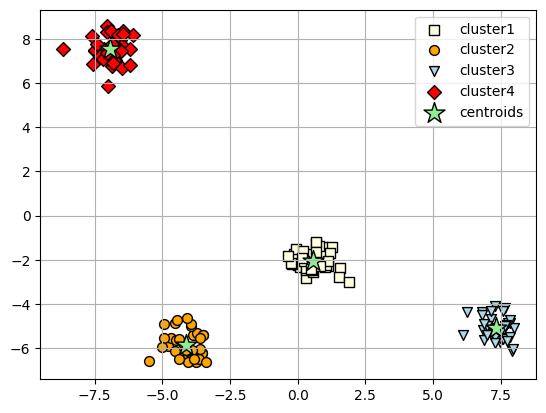

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,Y = make_blobs(n_samples=150, n_features=2,centers=4, cluster_std=0.5, shuffle = True)

km = KMeans(n_clusters=4, init='random', n_init =10, max_iter = 300, tol=1e-04, random_state=0)
Y_km = km.fit_predict(X)

plt.scatter(X[Y_km==0,0], X[Y_km ==0,1], s=50, c='lightyellow', marker = 's', edgecolor='black', label="cluster1")
plt.scatter(X[Y_km==1,0], X[Y_km ==1,1], s=50, c='orange', marker = 'o', edgecolor='black', label="cluster2")
plt.scatter(X[Y_km==2,0], X[Y_km ==2,1], s=50, c='lightblue', marker = 'v', edgecolor='black', label="cluster3")
plt.scatter(X[Y_km==3,0], X[Y_km ==3,1], s=50, c='red', marker = 'D', edgecolor='black', label="cluster4")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*', c='lightgreen', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

### Implementation of KNN using for loop

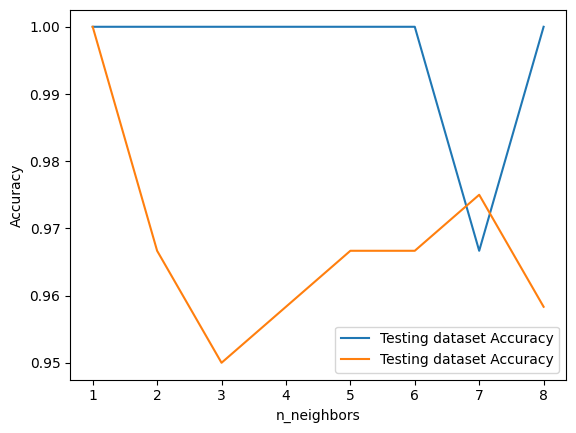

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

irisData = load_iris()

X=irisData.data
y=irisData.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

neighbors = np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracy[i]=knn.score(X_train, y_train)
    test_accuracy[i]=knn.score(X_test, y_test)
    
plt.plot(neighbors, test_accuracy, label='Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label='Testing dataset Accuracy')
    
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
    

### Linear Regression using tensorflow

In [20]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

test_data_size = 2000
iterations = 10000
learn_rate = 0.005

def generate_test_values():
    train_x=[]
    train_y = []
    for _ in range(test_data_size):
        x1=np.random.rand()
        x2=np.random.rand()
        x3=np.random.rand()
        y_f=2*x1+3*x2+7*x3+4
        train_x.append([x1,x2,x3])
        train_y.append(y_f)
    return np.array(train_x),np.transpose([train_y])
x = tf.placeholder(tf.float32,[None,3],name='x')
w = tf.Variable(tf.zeros([3,1]),name='w')
b = tf.Variable(tf.zeros([1]),name='b')
y = tf.placeholder(tf.float32,[None,1])

model = tf.add(tf.matmul(x,w),b)
cost  = tf.reduce_mean(tf.square(y-model))
train = tf.train.GradientDescentOptimizer(learn_rate).minimize(cost)

train_dataset, train_values = generate_test_values()
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    for _ in range(iterations):
        session.run(train,feed_dict={x:train_dataset,y:train_values})
    print("cost = {}".format(session.run(cost,feed_dict = {x:train_dataset, y:train_value})))

cost = 10.079404830932617
